In [4]:
import requests
import pandas as pd

# Configurações
API_KEY = "H4HtPfrjzfhwnlCh87QuJiuoetOwyZyv"  # Substitua pela sua chave da API
ticker = "AAPL"  # Substitua pelo ticker desejado
date = "2024-12-20"  # Data do interesse no formato AAAA-MM-DD

# Endpoint para obter trades
url = f"https://api.polygon.io/v2/ticks/stocks/trades/{ticker}/{date}?apiKey={API_KEY}"

# Requisição para obter dados
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    trades = data.get("results", [])
    # Transformar os dados em um DataFrame do Pandas
    df = pd.DataFrame(trades)
    print(df.head())
    # Salvar os dados em um arquivo CSV
    df.to_csv(f"{ticker}_trades_{date}.csv", index=False)
else:
    print("Erro ao obter dados:", response.json())


Erro ao obter dados: {'status': 'NOT_AUTHORIZED', 'request_id': '5e50911de378e206d610f5f73256c266', 'message': 'You are not entitled to this data. Please upgrade your plan at https://polygon.io/pricing'}


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMER3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2023-12-20 -> 2024-12-21) (Yahoo error = "1m data not available for startTime=1703041200 and endTime=1734750000. Only 8 days worth of 1m granularity data are allowed to be fetched per request.")')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


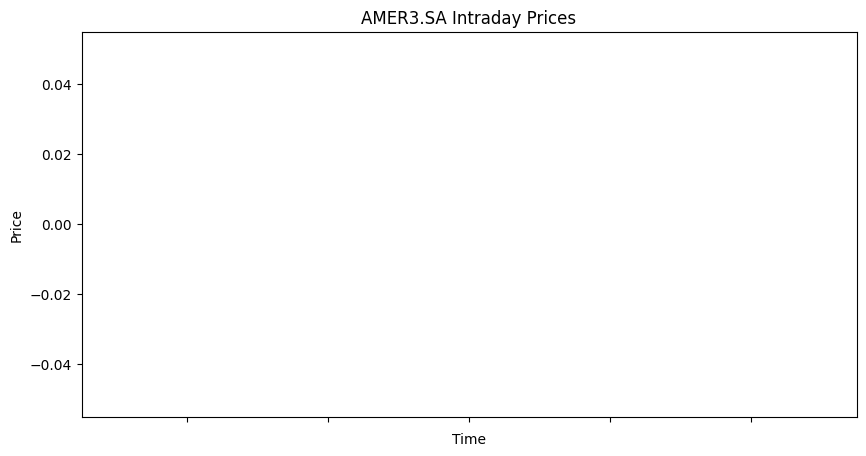

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock ticker and timeframe
ticker = "AMER3.SA"  # Replace with the desired stock ticker
start_date = "2023-12-20"  # Date of interest
end_date = "2024-12-21"    # Next day to include full data for the chosen date

# Fetch historical data
stock_data = yf.download(ticker, start=start_date, end=end_date, interval="1m")

# Display the data
print(stock_data.head())

# Plot the closing price for visualization
stock_data['Close'].plot(title=f"{ticker} Intraday Prices", figsize=(10, 5))
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
